In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from IPython.display import display

In [2]:
df0 = pd.read_csv('sao-paulo-properties-april-2019.csv')
display(df0.head(3))
display(df0.shape)

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665


(13640, 16)

In [3]:
## confere se há valor nulo (nan) no dataframe
display(df0.isnull().sum())

Price               0
Condo               0
Size                0
Rooms               0
Toilets             0
Suites              0
Parking             0
Elevator            0
Furnished           0
Swimming Pool       0
New                 0
District            0
Negotiation Type    0
Property Type       0
Latitude            0
Longitude           0
dtype: int64

In [4]:
display(df0.dtypes)

Price                 int64
Condo                 int64
Size                  int64
Rooms                 int64
Toilets               int64
Suites                int64
Parking               int64
Elevator              int64
Furnished             int64
Swimming Pool         int64
New                   int64
District             object
Negotiation Type     object
Property Type        object
Latitude            float64
Longitude           float64
dtype: object

In [5]:
# analisamos quias variaveis tinham valores binários que deveriamos substituir por 'sim' ou 'não'
# assim já excluímos as variáveis ['Price', 'Condo', 'Size', 'District', 'Latitude','Longitude']

display(df0['Rooms'].unique())
display(df0['Toilets'].unique())
display(df0['Suites'].unique())
display(df0['Parking'].unique())
display(df0['Elevator'].unique())
display(df0['Furnished'].unique())
display(df0['Swimming Pool'].unique())
display(df0['New'].unique())
display(df0['Negotiation Type'].unique())
display(df0['Property Type'].unique())

# concluímos que as séries 'Elevator, Furnished, Swimming Pool, New' podem ser transformadas
# em categorias

# Além disso, consideramos que as séries 'Latitude, Longitude' podem ser desconsideradas na
# análise de preços pois a série 'District' já permite analisar a interferencia da região no preço


array([ 2,  1,  3,  4,  5, 10,  6,  7], dtype=int64)

array([2, 3, 4, 1, 5, 6, 7, 8], dtype=int64)

array([1, 3, 2, 4, 0, 5, 6], dtype=int64)

array([1, 2, 3, 4, 5, 6, 8, 9, 0, 7], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array(['rent', 'sale'], dtype=object)

array(['apartment'], dtype=object)

rent: 52.99 %
sale: 47.01 %


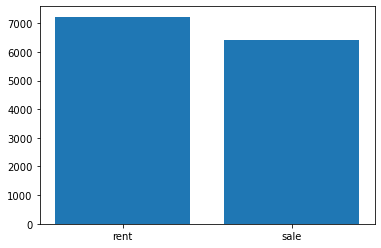

In [6]:
l_values = df0['Negotiation Type'].value_counts()

print(f'rent: {l_values[0]/df0.shape[0]*100:.2f} %')
print(f'sale: {l_values[1]/df0.shape[0]*100:.2f} %')
plt.bar(df0['Negotiation Type'].unique(), l_values)
plt.show()

# optamos por analizar somente os preços dos aps. alugados pois avisa uma base de dados
# um pouco maior

In [7]:
df0[['District','City']] = df0['District'].str.split('/', expand = True)
display(df0.City.unique())

# confirmamos que todos os dados são da cidade de São Paulo

array(['São Paulo'], dtype=object)

In [8]:
df0 = df0.drop(columns='City', axis=1)

In [9]:
rent = df0['Negotiation Type'] == 'rent'
## df = df.loc[maior,['Price', 'Condo', 'Size', 'Rooms', 'Toilets', 'Suites', 'Parking', 'Elevator', 'Furnished', 'Swimming Pool', 'New', 'District', 'Negotiation Type', 'Property Type', 'Latitude','Longitude']]
df = df0.loc[rent,['Price', 'Condo', 'Size', 'Rooms', 'Toilets', 'Suites', 'Parking', 'Elevator', 'Furnished', 'Swimming Pool', 'New', 'District', 'Property Type']]

In [10]:
df['Swimming Pool'] = df['Swimming Pool'].astype('category')
df['New'] = df['New'].astype('category')
df['District'] = df['District'].astype('category')
df['Property Type'] = df['Property Type'].astype('category')
df['Furnished'] = df['Furnished'].astype('category')
df['Elevator'] = df['Elevator'].astype('category')


In [11]:
df['Swimming Pool'].cat.categories = ['No', 'Yes']
df['Furnished'].cat.categories = ['No', 'Yes']
df['Elevator'].cat.categories = ['No', 'Yes']
df['New'].cat.categories = ['No', 'Yes']
display(df.head())
display(df.dtypes)

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Property Type
0,930,220,47,2,2,1,1,No,No,No,No,Artur Alvim,apartment
1,1000,148,45,2,2,1,1,No,No,No,No,Artur Alvim,apartment
2,1000,100,48,2,2,1,1,No,No,No,No,Artur Alvim,apartment
3,1000,200,48,2,2,1,1,No,No,No,No,Artur Alvim,apartment
4,1300,410,55,2,2,1,1,Yes,No,No,No,Artur Alvim,apartment


Price               int64
Condo               int64
Size                int64
Rooms               int64
Toilets             int64
Suites              int64
Parking             int64
Elevator         category
Furnished        category
Swimming Pool    category
New              category
District         category
Property Type    category
dtype: object

In [12]:
## df.to_csv('SP_rent_prices.csv')

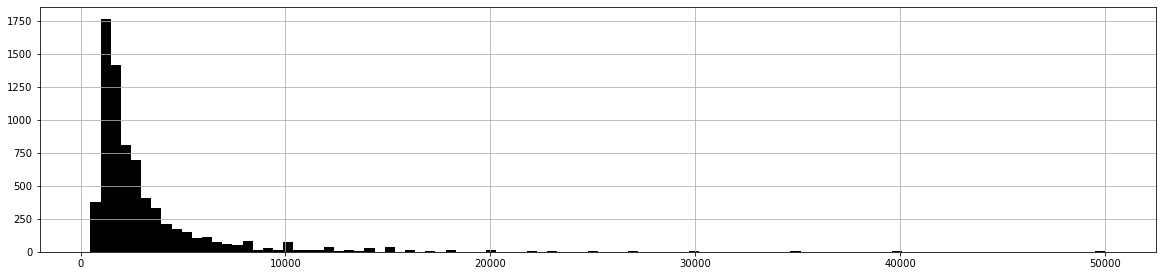

,Price,Condo,Size,Rooms,Toilets,Suites,Parking
count,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000
mean,3077.669065,825.194798,89.486165,2.304234,2.105562,1.024488,1.452269
std,3522.830284,835.621937,63.976416,0.829108,0.998162,0.884241,0.889535
min,480.000000,0.000000,30.000000,1.000000,1.000000,0.000000,0.000000
25%,1350.000000,395.750000,52.000000,2.000000,2.000000,1.000000,1.000000
50%,2000.000000,595.000000,67.000000,2.000000,2.000000,1.000000,1.000000
75%,3300.000000,990.000000,100.000000,3.000000,2.000000,1.000000,2.000000
max,50000.000000,9500.000000,880.000000,10.000000,8.000000,5.000000,9.000000


In [43]:
f = plt.figure(figsize=(20, 4.5))
plt.hist(df.Price, bins=100, color='k', linewidth=0.0, edgecolor='white')
plt.grid()
plt.show()

display(df.describe())

In [15]:
# # ['Price', 'Condo', 'Size', 'Rooms', 'Toilets', 'Suites', 'Parking', 'Elevator', 'Furnished', 'Swimming Pool', 'District', 'Property Type']
# print(f'Correlação Price/Condo: {df.Price.corr(df.Condo)*100:.3f} %')
# print(f'Correlação Price/Size: {df.Price.corr(df.Size)*100:.3f} %')
# print(f'Correlação Price/Rooms: {df.Price.corr(df.Rooms)*100:.3f} %')
# print(f'Correlação Price/Toilets: {df.Price.corr(df.Toilets)*100:.3f} %')
# print(f'Correlação Price/Suites: {df.Price.corr(df.Suites)*100:.3f} %')
# print(f'Correlação Price/Parking: {df.Price.corr(df.Parking)*100:.3f} %')
# # print(f'Correlação Price\Elevator: {df.Price.corr(df.Elevator)*100:.3f} %')
# # print(f'Correlação Price\Furnished: {df.Price.corr(df.Furnished)*100:.3f} %')
# # # print(f'Correlação Price/Swimming Pool: {df['Price'].corr(df['Swimming Pool'])*100:.3f} %')
# # print(f'Correlação Price\District: {df.Price.corr(df.District)*100:.3f} %')
# # # print(f'Correlação Price/Property Type: {df.Price.corr(df.Property Type)*100:.3f} %')